In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [491]:
df = pd.read_csv('../../result/radius0.1/same_period_maxlength/type20_radius0.1_period0.9_maxlength1.9.csv')

In [492]:
df.size

189981

In [493]:
df.head()

,Time,sphere_pos_0_x,sphere_pos_0_y,sphere_pos_0_z,sphere_pos_1_x,sphere_pos_1_y,sphere_pos_1_z,sphere_pos_2_x,sphere_pos_2_y,sphere_pos_2_z,arm_force_0,arm_force_1,arm_force_2,arm_extensile_velocity__0,arm_extensile_velocity__1,arm_extensile_velocity__2,arm_length_0,arm_length_1,arm_length_2
0,0.0,0.577000,0.000000e+00,0,-0.289000,0.5000,0,-0.289000,-0.5000,0,0.000000,0.000000,0.000000,1.0,1.0,-1,1.00000,1.00000,1.000
1,0.1,0.654512,-3.885780e-19,0,-0.325530,0.4995,0,-0.325530,-0.4995,0,0.920140,0.920140,-0.364919,1.0,1.0,-1,1.09899,1.09899,0.999
2,0.2,0.729738,-5.551120e-20,0,-0.361365,0.4995,0,-0.361365,-0.4995,0,0.872049,0.872049,-0.319094,1.0,1.0,-1,1.19900,1.19900,0.999
3,0.3,0.803430,-4.718450e-19,0,-0.396789,0.4995,0,-0.396789,-0.4995,0,0.836191,0.836191,-0.284306,1.0,1.0,-1,1.29901,1.29901,0.999
4,0.4,0.875949,8.326670e-20,0,-0.431929,0.4995,0,-0.431929,-0.4995,0,0.808503,0.808503,-0.256889,1.0,1.0,-1,1.39902,1.39902,0.999


In [494]:
df_arm_vel = df[['arm_extensile_velocity__0', 'arm_extensile_velocity__1', 'arm_extensile_velocity__2']]

In [495]:
df_arm_vel.shape

(9999, 3)

In [496]:
df_arm_vel[0::5].head(8)

,arm_extensile_velocity__0,arm_extensile_velocity__1,arm_extensile_velocity__2
0,1.0,1.000000,-1
5,1.0,1.000000,-1
10,-1.0,1.000000,-1
15,-1.0,1.000000,-1
20,-1.0,1.000000,1
25,-1.0,1.000000,1
30,1.0,-0.400802,-1
35,1.0,-0.400802,-1


In [508]:
arm_vels = df_arm_vel[::1].values

<IPython.core.display.Javascript object>


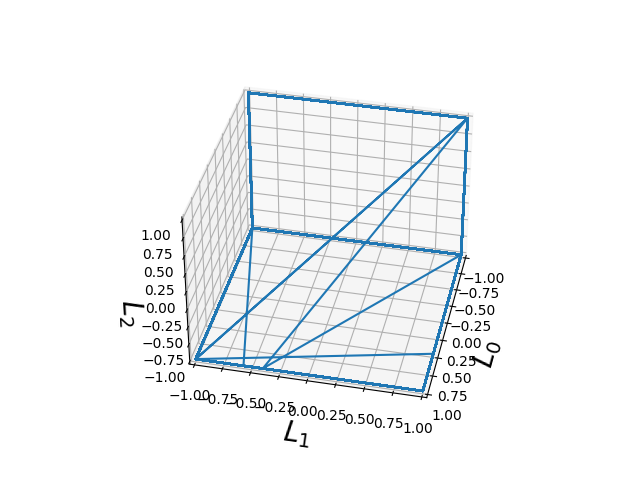

In [509]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel(r'$L_0$', fontsize=20)
ax.set_ylabel(r'$L_1$', fontsize=20)
ax.set_zlabel(r'$L_2$', fontsize=20)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.view_init(elev=30, azim=25)

data = arm_vels.T
ax.plot(data[0], data[1], data[2])

In [499]:
"""
round to -1 ~ 1
"""
def clipOne(array2d):
    clipped = []
    for array1d in array2d:
        tmp = [1.0 if item >= 0.0 else -1.0 for item in array1d]
        clipped.append(tmp)
    return np.array(clipped)

In [500]:
"""
Extract force sequence
"""
def getSeq(series_data):
    return_seq = []
    for i, data in enumerate(series_data):
        if i == 0:
            return_seq.append(data)
        else:
            if any(data != return_seq[-1]):
                return_seq.append(data)
    return np.array(return_seq)

In [501]:
"""
count each force tuples in series
"""
def countEachTuple(series_data):
    types = {}
    for i, one_data in enumerate(series_data[:-1]):
        if tuple(one_data) not in types:
            types[tuple(one_data)] = {
                'count': 1,
                'next': set()
            }
            types[tuple(one_data)]['next'].add(tuple(series_data[i+1]))
        else:
            types[tuple(one_data)]['count'] += 1
            if tuple(series_data[i+1]) not in types[tuple(one_data)]['next']:
                types[tuple(one_data)]['next'].add(tuple(series_data[i+1]))
    
    return types

In [502]:
"""
count each force tuples in series
"""
def countEachTuple2(series_data):
    types = {}
    for i, one_data in enumerate(series_data[:-1]):
        if tuple(one_data) not in types:
            types[tuple(one_data)] = {
                'count': 1,
                'next': dict()
            }
            types[tuple(one_data)]['next'][tuple(series_data[i+1])] = 1
        else:
            types[tuple(one_data)]['count'] += 1
            if tuple(series_data[i+1]) not in types[tuple(one_data)]['next']:
                types[tuple(one_data)]['next'][tuple(series_data[i+1])] = 1
            else:
                types[tuple(one_data)]['next'][tuple(series_data[i+1])] += 1
    
    return types

In [510]:
# clipped_arm_vels = clipOne(arm_vels)
clipped_arm_vels = arm_vels.copy()
# clipped_arm_vels = np.round(arm_vels, 0)
clipped_arm_vels.shape

(9999, 3)

In [511]:
arm_vels_seq = getSeq(clipped_arm_vels)
arm_vels_seq.shape

(1111, 3)

In [512]:
type_set = countEachTuple(arm_vels_seq)
type_set

{(1.0, 1.0, -1.0): {'count': 140, 'next': {(-1.0, 1.0, -1.0)}},
 (-1.0, 1.0, -1.0): {'count': 278,
  'next': {(-1.0, -1.0, -1.0), (-1.0, 1.0, 1.0)}},
 (-1.0, 1.0, 1.0): {'count': 139,
  'next': {(-1.0, 1.0, -1.0), (1.0, -1.0, -1.0), (1.0, -0.400802, -1.0)}},
 (1.0, -0.400802, -1.0): {'count': 1, 'next': {(-1.0, 1.0, -1.0)}},
 (1.0, -1.0, -1.0): {'count': 139,
  'next': {(0.48809, 1.0, -1.0), (1.0, 1.0, -1.0)}},
 (0.48809, 1.0, -1.0): {'count': 1, 'next': {(-1.0, 1.0, -1.0)}},
 (-1.0, -1.0, -1.0): {'count': 275,
  'next': {(-1.0, -1.0, 1.0), (1.0, -1.0, -1.0), (1.0, -0.572218, -1.0)}},
 (1.0, -0.572218, -1.0): {'count': 1, 'next': {(1.0, 1.0, -1.0)}},
 (-1.0, -1.0, 1.0): {'count': 136, 'next': {(-1.0, 1.0, 1.0)}}}

In [513]:
type_set2 = countEachTuple2(arm_vels_seq)
type_set2

{(1.0, 1.0, -1.0): {'count': 140, 'next': {(-1.0, 1.0, -1.0): 140}},
 (-1.0, 1.0, -1.0): {'count': 278,
  'next': {(-1.0, 1.0, 1.0): 3, (-1.0, -1.0, -1.0): 275}},
 (-1.0, 1.0, 1.0): {'count': 139,
  'next': {(1.0, -0.400802, -1.0): 1,
   (1.0, -1.0, -1.0): 2,
   (-1.0, 1.0, -1.0): 136}},
 (1.0, -0.400802, -1.0): {'count': 1, 'next': {(-1.0, 1.0, -1.0): 1}},
 (1.0, -1.0, -1.0): {'count': 139,
  'next': {(0.48809, 1.0, -1.0): 1, (1.0, 1.0, -1.0): 138}},
 (0.48809, 1.0, -1.0): {'count': 1, 'next': {(-1.0, 1.0, -1.0): 1}},
 (-1.0, -1.0, -1.0): {'count': 275,
  'next': {(1.0, -0.572218, -1.0): 1,
   (1.0, -1.0, -1.0): 138,
   (-1.0, -1.0, 1.0): 136}},
 (1.0, -0.572218, -1.0): {'count': 1, 'next': {(1.0, 1.0, -1.0): 1}},
 (-1.0, -1.0, 1.0): {'count': 136, 'next': {(-1.0, 1.0, 1.0): 136}}}

<IPython.core.display.Javascript object>


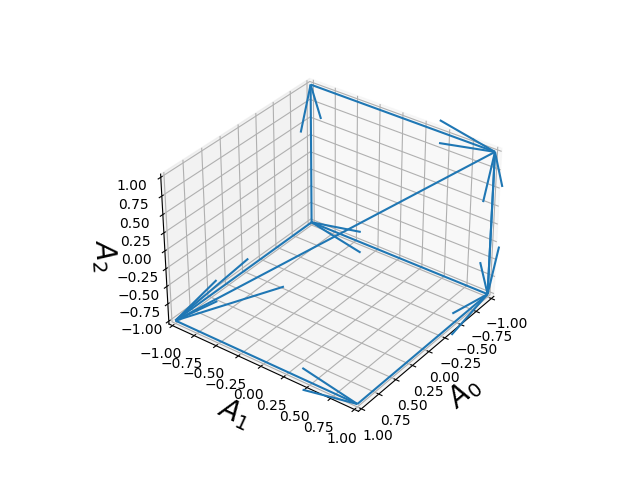

In [515]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel(r'$A_0$', fontsize=20)
ax.set_ylabel(r'$A_1$', fontsize=20)
ax.set_zlabel(r'$A_2$', fontsize=20)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.view_init(elev=30, azim=25)

for origin, next_ in type_set2.items():
    if next_['count'] < 2:
        continue
    target_list = next_['next']
    for target, count in target_list.items():
        if count < 2:
            continue
        ax.quiver(origin[0], origin[1], origin[2], (target[0]-origin[0]), (target[1]-origin[1]), (target[2]-origin[2]), )

In [452]:
arm_vels_seq[:8]

array([[ 1.,  1., -1.],
       [-1.,  1., -1.],
       [-1., -1., -1.],
       [-1., -1.,  1.],
       [-1.,  1.,  1.],
       [-1.,  1., -1.],
       [-1., -1., -1.],
       [ 1., -1., -1.]])

In [351]:
# np.savetxt(fname='../../optimal_action_pattern/radius0.1/009.csv', X=arm_vels_seq[:8], delimiter=',', fmt='%.3f')

In [15]:
"""
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.view_init(elev=30, azim=25)

data = force_seq.T
ax.plot(data[0], data[1], data[2])
"""

"\n%matplotlib notebook\n\nfig = plt.figure()\nax = fig.add_subplot(111, projection='3d')\nax.set_xlim(-1, 1)\nax.set_ylim(-1, 1)\nax.set_zlim(-1, 1)\nax.view_init(elev=30, azim=25)\n\ndata = force_seq.T\nax.plot(data[0], data[1], data[2])\n"